In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

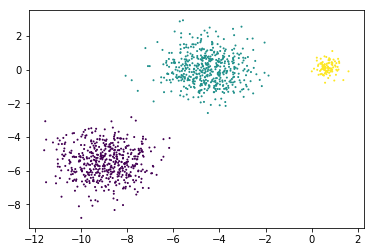

In [2]:
from sklearn.datasets import make_blobs

nb_samples = 1500
random_state = 170
X1, y1 = make_blobs(n_samples=nb_samples, random_state=random_state)

X1 = X1[y1!=2]
y1 = y1[y1!=2]

X2, y2 = make_blobs(n_samples=nb_samples, random_state=random_state)
X2 = X2/3.

X2 = X2[y2==2][:100]
y2 = y2[y2==2][:100]

X = np.concatenate([X1,X2], 0)
y = np.hstack([y1,y2])

nb_samples = X.shape[0]

plt.scatter(X[:,0],X[:,1], c=y, s=1)

In [3]:
epsilon = 0.5
minpts = 5

In [4]:
import copy

def metric(xi,xj):
    return np.sqrt(np.square(xi-xj).sum())

eps_neighbor_indices = []
for i,xi in enumerate(X):
    xi_neighbor = []
    for j,xj in enumerate(X):
        if metric(xi,xj) < epsilon:
            xi_neighbor.append(j)
    eps_neighbor_indices.append(xi_neighbor)

In [5]:
visited = np.array([False]*nb_samples)
cluster_indices = np.ones(nb_samples).astype(np.int32)*-1 # クラスタ番号は-1で初期化

# 未訪問データ点のインデックスリスト
unvisited_idx = np.linspace(0,nb_samples-1,nb_samples).astype(np.int32)[visited==False]

cluster2pntidxs = {}

nb=0
while len(unvisited_idx)>0:
    
    # 未訪問データ点の集合からランダムサンプリング。訪問済みとする。
    sample_idx = unvisited_idx[np.random.randint(len(unvisited_idx))]
    visited[sample_idx] = True
    
    # サンプリングしたデータ点の近辺のデータ点（到達可能点の集合）
    sample_neighbor_indices = eps_neighbor_indices[sample_idx]
    
    if len(sample_neighbor_indices)>=minpts:
        
        # 近隣データ点にクラスタ番号がすでに振られているかどうかを判定する。
        neighbor_clusters_set = list(set(cluster_indices[sample_neighbor_indices]))
        neighbor_clusters_set.remove(-1)
        if len(neighbor_clusters_set)>0:
            cluster_index = np.array(neighbor_clusters_set).max()
        else:
            cluster_index = np.array(cluster_indices).max() + 1
            
        # クラスタ番号をつける。
        cluster_indices[sample_idx] = cluster_index
        if cluster_index in cluster2pntidxs.keys():
            cluster2pntidxs[cluster_index] = cluster2pntidxs[cluster_index] + [sample_idx]
        else:
            cluster2pntidxs.update({cluster_index:[sample_idx]})
        
        cluster_indices[sample_neighbor_indices] = cluster_index
        cluster2pntidxs[cluster_index] = cluster2pntidxs[cluster_index] + sample_neighbor_indices
        
        # 近隣データ点にクラスタ番号があらかじめついていた場合、
        # 各クラスタの番号をcluster_indexに書き換える。
        if len(neighbor_clusters_set)>0:
            neighbor_clusters_set.remove(cluster_index)
            for c in neighbor_clusters_set:
                cluster_indices[cluster2pntidxs[c]] = cluster_index
                # クラスタ番号→データインデックスの更新
                cluster2pntidxs[cluster_index] = cluster2pntidxs[cluster_index] + cluster2pntidxs[c]
                cluster2pntidxs.pop(c)
            
        # 近隣データ点を訪問済みにする
        visited[sample_neighbor_indices] = True

    # 未訪問データ点のインデックスリストを更新。
    unvisited_idx = np.linspace(0,nb_samples-1,nb_samples).astype(np.int32)[visited==False]
    
    if True:
        plt.figure(figsize=(10,10))
        plt.scatter(X[:,0],X[:,1], c=cluster_indices, s=5)
        plt.savefig('dbscan.'+str(nb).zfill(4)+'.png', bbox_inches='tight')
        nb+=1
        plt.close()

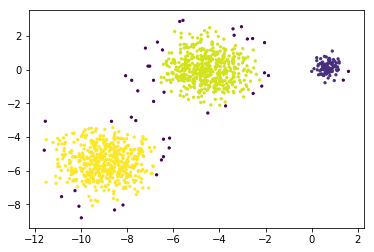

In [6]:
plt.scatter(X[:,0],X[:,1], c=cluster_indices, s=5)